In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('C:/Users/ANUP GOWDA/OneDrive/Documents/wine_data.csv',header = None,usecols = [0,1,2])
df.columns = ['Class label','Alchol','Malic acid']

In [9]:
df

,Class label,Alchol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alchol', ylabel='Density'>

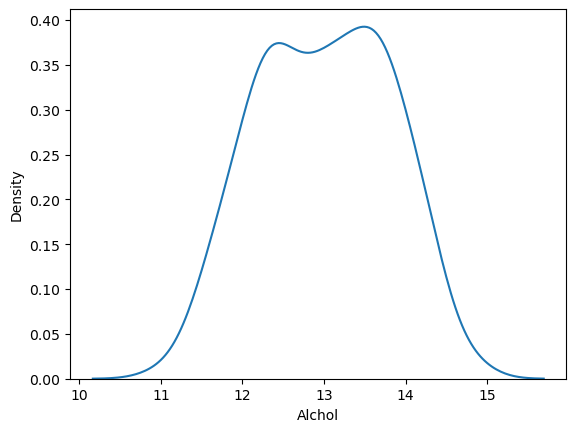

In [12]:
sns.kdeplot(df['Alchol'])

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('Class label', axis=1)
y = df['Class label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [22]:
np.round(X_train.describe(),1)

,Alchol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [23]:
np.round(X_train_scaled.describe(),1)

,Alchol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


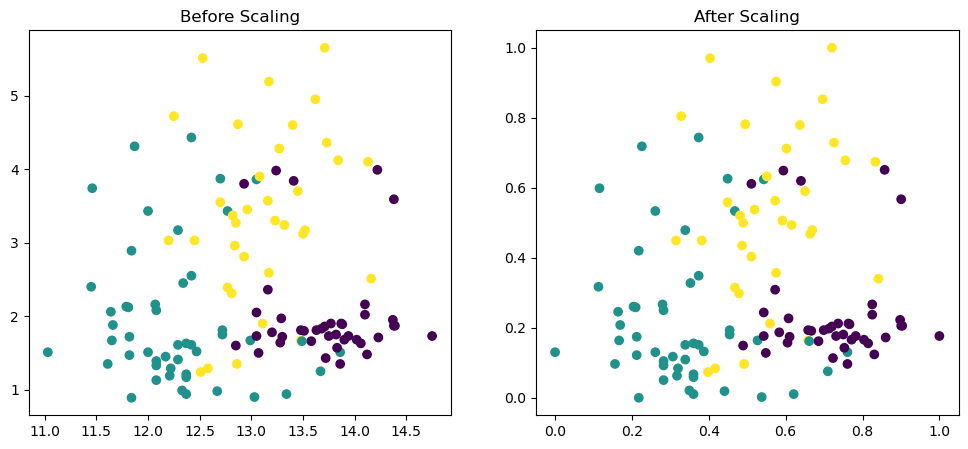

In [29]:
fig,(ax1 ,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

ax1.scatter(X_train['Alchol'],X_train['Malic acid'],c = y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alchol'],X_train_scaled['Malic acid'],c = y_train)
ax2.set_title("After Scaling")

plt.show()

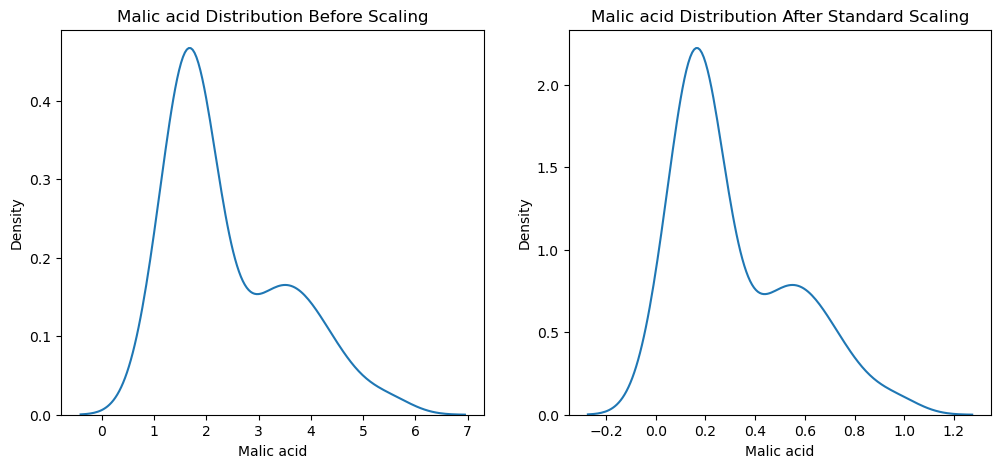

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()